In [38]:
import wandb as wb

from pathlib import Path
import pandas as pd
import skimage
from tqdm import tqdm

In [39]:
PROJECT_NAME = 'Ships_wandb_course'
DATA_DIR = Path('./data/images').resolve()
LABELS_DIR = Path('./data/labels.csv').resolve()

In [40]:
categories = {
    1: 'cargo',
    2: 'navy',
    3: 'carrier',
    4: 'cruise',
    5: 'tanker'
}

In [41]:
df = pd.read_csv(LABELS_DIR)
df.head(2)

,image,category
0,2823080.jpg,1
1,2870024.jpg,1


cargo


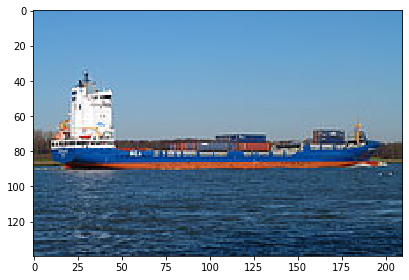

In [42]:
img = skimage.io.imread(DATA_DIR/df['image'].values[0])
skimage.io.imshow(img)
print(categories[df['category'].values[0]])

In [43]:
def wandb_image(img: str):
    path = DATA_DIR/img
    image = skimage.io.imread(str(path))
    return wb.Image(data_or_path=image)

In [44]:
def make_row(img_file: str, label: int):
    img = wandb_image(img_file)
    name = img_file.replace('.jpg', '')
    file = str(DATA_DIR/img_file)
    label = categories[label]
    return [img, name, file, label]

In [45]:
images = list(zip(df['image'], df['category']))
images[0]

('2823080.jpg', 1)

In [46]:
data = []
for img, label in tqdm(images):
    row = make_row(img, label)
    data.append(row)

100%|██████████| 6252/6252 [00:59<00:00, 104.69it/s]


In [47]:
with wb.init(job_type='learn', project=PROJECT_NAME) as run:
    img_df = pd.DataFrame(data=data,
        columns=['img', 'name', 'file', 'label'])
    run.log({'ship_images': wb.Table(dataframe=img_df)})

wandb: Network error (TransientError), entering retry loop.
wandb: Network error (TransientError), entering retry loop.
wandb: Network error (TransientError), entering retry loop.
wandb: Network error (ConnectTimeout), entering retry loop.
wandb: Network error (ConnectTimeout), entering retry loop.
wandb: Network error (ConnectTimeout), entering retry loop.
wandb: Network error (ConnectTimeout), entering retry loop.
wandb: Network error (TransientError), entering retry loop.
wandb: Network error (TransientError), entering retry loop.
